In [31]:
from extract_data import *
import numpy as np

cat_data = load_list('pickle_data', 'cat_data')
tilts = get_tilt_timeseries(cat_data)
y = get_labels(cat_data)

#mags = get_mags(tilts)

#tilts = np.reshape(tilts, (tilts.shape[0],216))
#tilts = np.hstack((tilts,mags))

x = tilts
num_features = (x.shape[1])
print(x.shape)

100%|██████████| 95/95 [00:00<00:00, 4999.05it/s]

(95, 72, 3)


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten

channels = 3



model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(72,3)))
model.add(MaxPool1D(pool_size=2, strides=1))
#model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPool1D(pool_size=2, strides=1))
#model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPool1D(pool_size=2, strides=1))

model.add(Flatten())

model.add(Dense(128, input_dim= num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss=BinaryCrossentropy(), optimizer=SGD(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(np.array(x_train), np.array(y_train), epochs=1000)



Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 4/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.8353
Epoch 11/1000
3/3 [

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


Text(0, 0.5, 'accuracy')

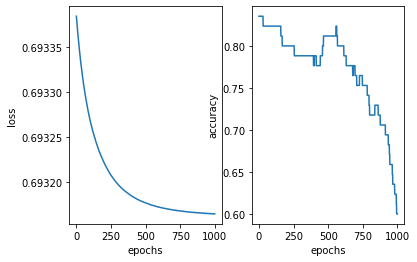

In [35]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [36]:
y_preds = model.predict(x_test)
y_train_preds = model.predict(x_train)
print(y_test)
print(y_preds)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[0.50045764 0.49954236]
 [0.49993697 0.500063  ]
 [0.5000481  0.49995193]
 [0.50053805 0.499462  ]
 [0.49988908 0.50011086]
 [0.4990652  0.5009348 ]
 [0.5156117  0.4843883 ]
 [0.5005531  0.4994469 ]
 [0.49971935 0.5002807 ]
 [0.50137144 0.4986286 ]]
